In [ ]:
#data handling and positive cell count
#gene expression per cell

%matplotlib inline
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean


data=pd.read_csv('/mnt/Labox/Katherine/Sonic/33/ObjectResults/Sonic_33_Microglia.csv', sep='\t', engine='python')

print(data)


data.loc[(data['Condition']=='--'), 'Genotype'] = 'GFAP-cre;Smo-/-'
data.loc[data['Condition']=='++', 'Genotype'] = 'WT'

print(data.columns)
Fcounts={'ROI':[], 'Total Microglia':[], 'Lcn2+ Microglia (%)':[],  'Adam10+ Microglia (%)':[], 'Cx3cr1+ Microglia (%)':[], 'C1qa+ Microglia (%)':[], 'Condition':[]}

regions=list(data['ROI'].unique())
conditions=list(data['Genotype'].unique())
sections= list(data['Section'].unique())
measurements=list(data['Measurement'].unique())

data.to_csv('/mnt/Labox/Katherine/Sonic/33/ObjectResults/Sonic_33_Microglia.csv')

for r in regions:
    for c in conditions:
        for m in measurements:
            for s in sections:
                #for ct in celltypes:

                tot=len(data[(data['ROI']==r) & (data['Genotype']==c) &(data['Measurement']==m) & (data['Section']==s)])

                totl=len(data[(data['ROI']==r) & (data['Genotype']==c)&(data['Measurement']==m)& (data['Section']==s) & (data['Microglia - Number of Spots']>5)])
                tota=len(data[(data['ROI']==r) & (data['Genotype']==c)&(data['Measurement']==m)& (data['Section']==s) & (data['Microglia - Number of Spots (2)']>5)])
                totcx=len(data[(data['ROI']==r) & (data['Genotype']==c)&(data['Measurement']==m) & (data['Section']==s) & (data['Microglia - Number of Spots (3)']>5)])
                totc1=len(data[(data['ROI']==r) & (data['Genotype']==c)&(data['Measurement']==m) & (data['Section']==s) & (data['Microglia - Number of Spots (4)']>5)])

                #tota = len(data[(data['Condition']==c) & (data['ROI']==r) & (data['Measurement']==m)& (data['Section']==s)])

                if tot>0:





                    Fcounts['ROI'].append(r)
                    Fcounts['Total Microglia'].append(tot)

                    Fcounts['Lcn2+ Microglia (%)'].append((totl/tot)*100)
                    Fcounts['Adam10+ Microglia (%)'].append((tota/tot)*100)
                    Fcounts['Cx3cr1+ Microglia (%)'].append((totcx/tot)*100)
                    Fcounts['C1qa+ Microglia (%)'].append((totc1/tot)*100)

                    Fcounts['Condition'].append(c)



Ffcsv=pd.DataFrame(data=Fcounts)

print(Ffcsv)
#Ffcsv.to_csv('/mnt/Labox/Katherine/Sonic/30/CellcountResults/cellcount_mg_0422.csv')

       Unnamed: 0  Unnamed: 0.1  Row  Column  Timepoint  Field  Object No  \
0               0          1400    1       4          0    416          9   
1               1          2583    1       4          0    456          1   
2               2          2584    1       4          0    456          2   
3               3          2587    1       4          0    456          5   
4               4          2588    1       4          0    456          6   
...           ...           ...  ...     ...        ...    ...        ...   
14499       14499         60292    1       4          0     39         80   
14500       14500         60294    1       4          0     39         82   
14501       14501         60295    1       4          0     39         83   
14502       14502         60296    1       4          0     39         84   
14503       14503         60297    1       4          0     39         85   

          X     Y           Bounding Box  ...  \
0       109   161         

KeyError: 'Microglia - Number of Spots (2)'

Index(['Unnamed: 0', 'ROI', 'Condition', 'Genotype', 'Total Astrocyte #',
       'Megf10+Mertk+Gli1- Astrocytes # / Total Astrocytes',
       'Megf10+Mertk+ Astrocytes # / Total Astrocytes',
       'Megf10+Mertk+Gli1+ Astrocytes # / Total Astrocytes',
       'Gli1+ Astrocytes # / Total Astrocytes',
       'Mertk+ Astrocytes # / Total Astrocytes',
       'Megf10+ Astrocytes # / Total Astrocytes',
       'IL-33+ Astrocytes # / Total Astrocytes',
       'Megf10+Mertk+ Astrocytes # / Gli1+ Astrocytes',
       'Megf10+Mertk+ Astrocytes # / IL-33+ Astrocytes'],
      dtype='object')


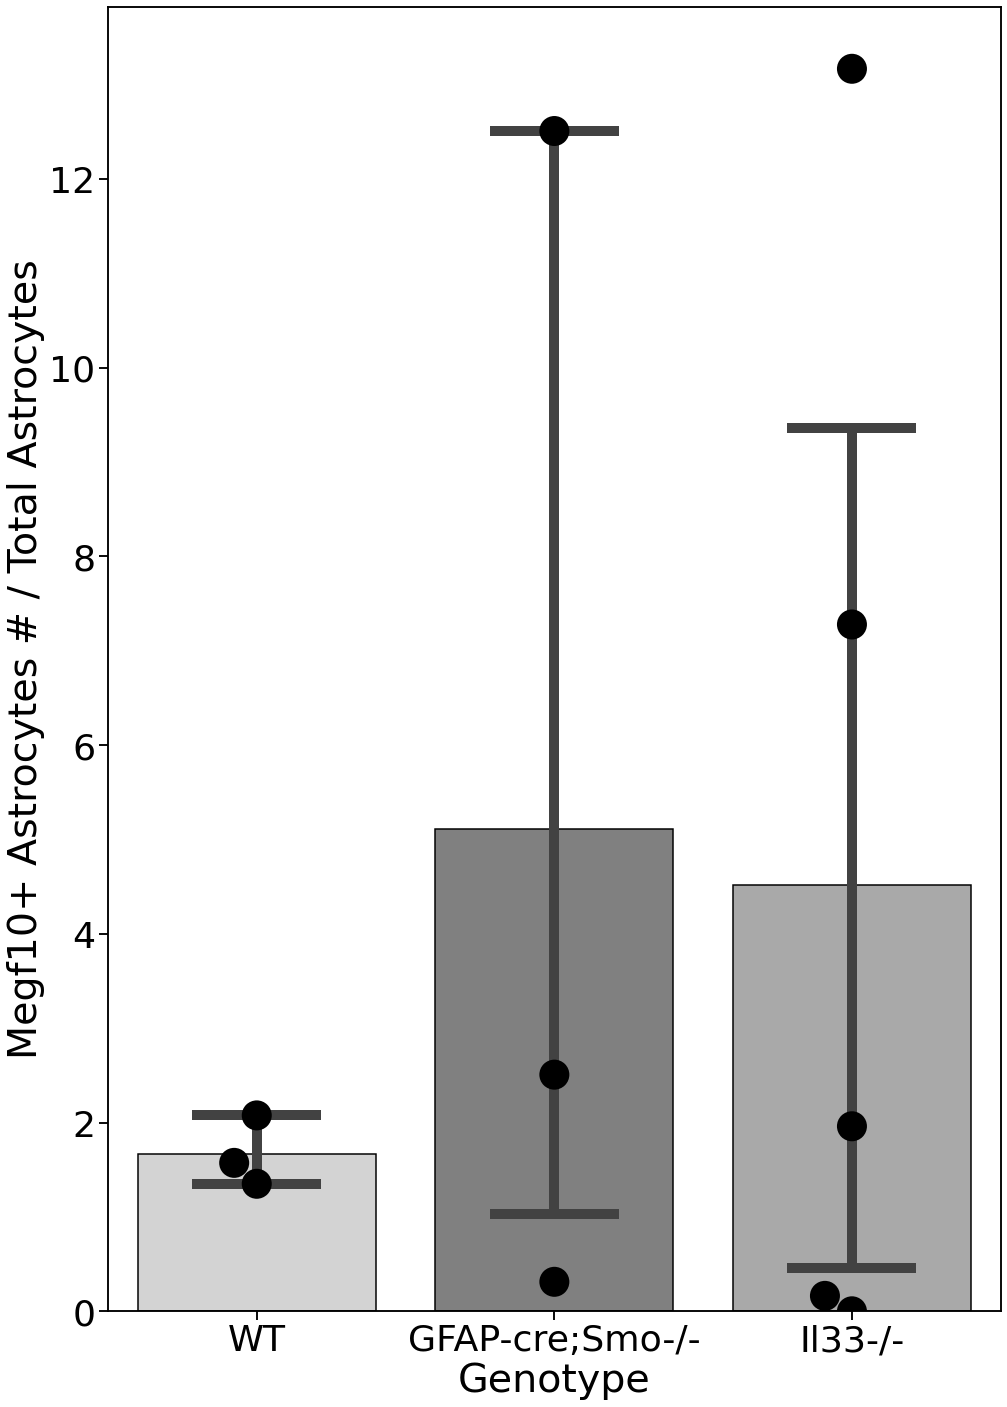

In [ ]:
data=pd.read_csv('/mnt/Labox/Katherine/Sonic/18/CellCountResults/Sonic18_1_061021.csv')
print(data.columns)
data=data[data['ROI']=='L6']
x=data['Genotype']
y=data['Megf10+ Astrocytes # / Total Astrocytes']

#hue=data['Condition']

sns.set_context("talk", font_scale=2.2)
fig_dims = (16, 24)
fig, ax = plt.subplots(figsize=fig_dims)
#ax.set_ylim([0, 66])


#plt.title='Car2'
sns.barplot(data=data,
              x=x, y=y,
              edgecolor="black", order=['WT', 'GFAP-cre;Smo-/-', 'Il33-/-'], palette={'WT':'#D3D3D3', 'GFAP-cre;Smo-/-':'#808080', 'Il33-/-':'darkgray'}, errwidth=10, capsize=0.4)
sns.swarmplot(data=data, x=x, y=y, order=['WT', 'GFAP-cre;Smo-/-', 'Il33-/-'], size=30, palette={'WT':'black', 'GFAP-cre;Smo-/-':'black', 'Il33-/-':'black'}, edgecolor="black", dodge=0.5)
#plt.legend([],[], frameon=False)
plt.savefig('/mnt/Labox/Katherine/Sonic/18/Figures/megf10_cellcount_L6_0422.jpg')

In [ ]:
#gene expression per cell

%matplotlib inline
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean

data=pd.read_csv('/mnt/Labox/Katherine/Sonic/33/ObjectResults/Sonic_33_Microglia.csv', engine='python')
print(data.columns)

Fcounts={'ROI':[], 'Genotype':[], 'Mean Active synapses in volume of Microglia (μm³)':[],'Measurement':[]}

regions=list(data['ROI'].unique())
conditions=list(data['Genotype'].unique())
sections= list(data['Section'].unique())
measurements=list(data['Measurement'].unique())
    #celltypes = list(data['Celltype'].unique(
    #for data in datalist:


for c in conditions:
    for r in regions:
        for m in measurements:
            for s in sections:




                t1= data['Microglia - Number of Spots- per Cell '].between(data['Microglia - Number of Spots- per Cell '].quantile(.05), data['Microglia - Number of Spots- per Cell '].quantile(0.95))




                datat=data[(data['Genotype']==c)
                           & (data['ROI']==r)
                           & (data['Section']==s) & (data['Measurement']==m)
                           & t1]





                Fcounts['ROI'].append(r)
                Fcounts['Mean Active synapses in volume of Microglia (μm³)'].append(datat['Microglia - Number of Spots- per Cell '].mean())



                Fcounts['Genotype'].append(c)
                Fcounts['Measurement'].append(m)





Ffcsv=pd.DataFrame(data=Fcounts)


print(Ffcsv)

Ffcsv.to_csv('/mnt/Labox/Katherine/Sonic/33/CellCountResults/activesynapse3dmg_010422.csv', encoding='utf-8')



Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Row', 'Column',
       'Timepoint', 'Field', 'Object No', 'X', 'Y', 'Bounding Box',
       'Position X [µm]', 'Position Y [µm]', 'Compound', 'Concentration',
       'Cell Type', 'Cell Count', 'Microglia - Object No in Nuclei',
       'Microglia - Object No in Nuclei Microglia',
       'Microglia - Object No in Microglia1',
       'Microglia - Cell Area [µm²] (2)', 'Microglia - Cell Roundness (2)',
       'Microglia - Cell Length [µm]', 'Microglia - Number of Spots',
       'Microglia - Number of Spots per Area of Cell',
       'Microglia - Number of Spots- per Cell ',
       'Microglia - Spots (mg) over neurons Nearest Object No',
       'Microglia - MG-neuron overlap', 'Unnamed: 25', 'ROI', 'Condition',
       'Section', 'Object', 'Measurement', 'Region_Area', 'Genotype'],
      dtype='object')
     ROI         Genotype  Mean Active synapses in volume of Microglia (μm³)  \
0   L2_3               WT                                

    Unnamed: 0   ROI         Genotype  \
0            0  L2_3               WT   
1            1  L2_3               WT   
2            2    L4               WT   
3            3    L4               WT   
4            4    L6               WT   
5            5    L6               WT   
6            6    L5               WT   
7            7    L5               WT   
8            8    L1               WT   
9            9    L1               WT   
10          10  L2_3  GFAP-cre;Smo-/-   
11          11  L2_3  GFAP-cre;Smo-/-   
12          12    L4  GFAP-cre;Smo-/-   
13          13    L4  GFAP-cre;Smo-/-   
14          14    L6  GFAP-cre;Smo-/-   
15          15    L6  GFAP-cre;Smo-/-   
16          16    L5  GFAP-cre;Smo-/-   
17          17    L5  GFAP-cre;Smo-/-   
18          18    L1  GFAP-cre;Smo-/-   
19          19    L1  GFAP-cre;Smo-/-   
20          10  L2_3          Il33-/-   
21          11  L2_3          Il33-/-   
22          12    L4          Il33-/-   
23          13  

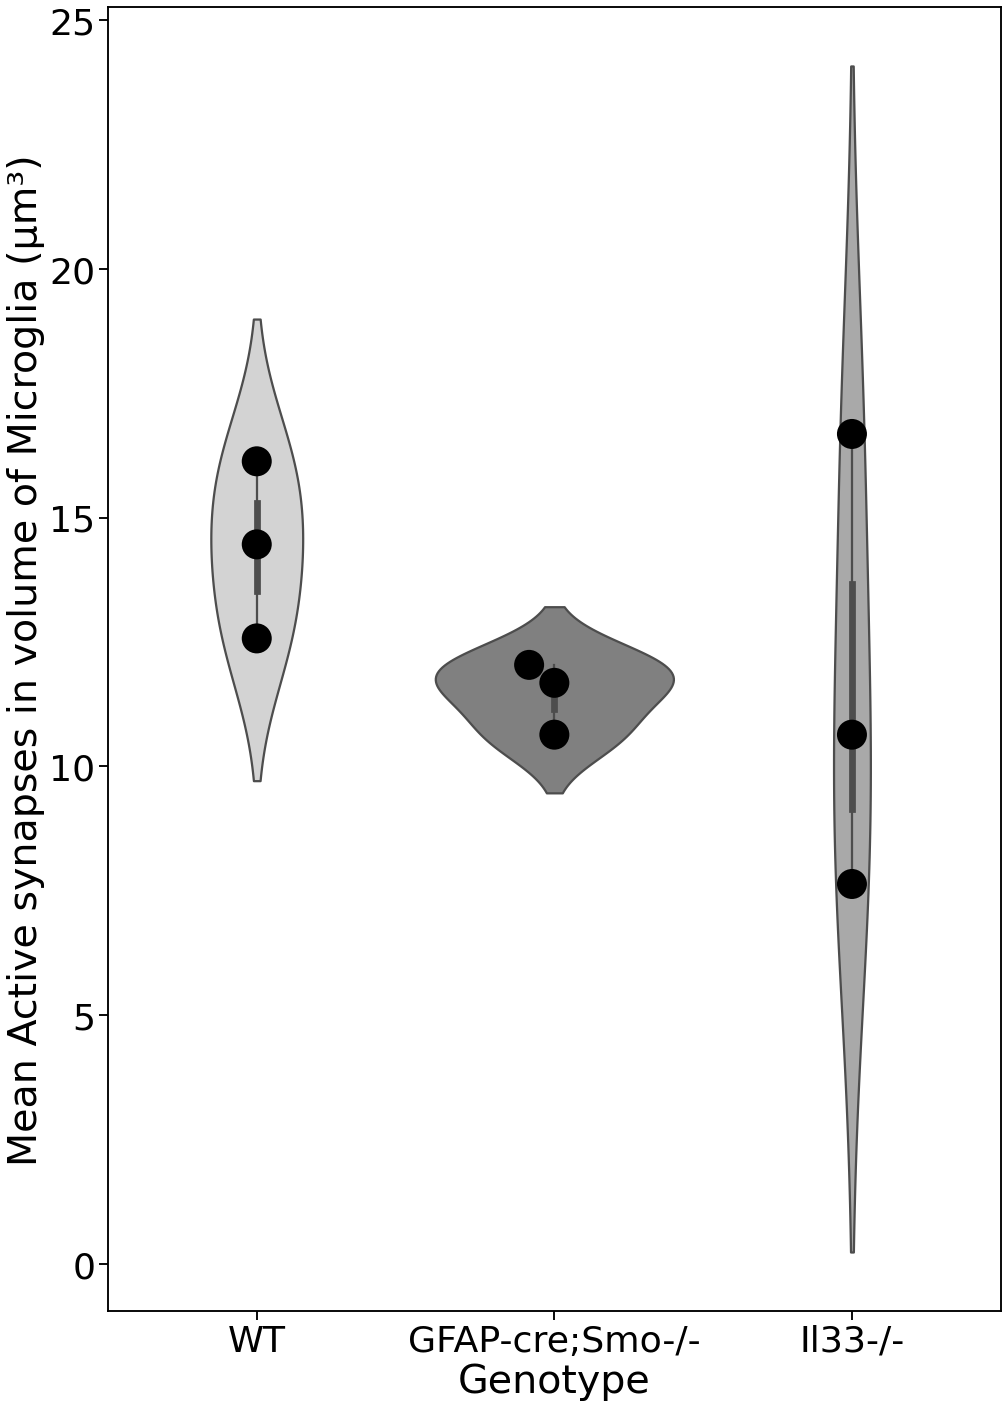

In [ ]:
data=pd.read_csv('/mnt/Labox/Katherine/Sonic/33/CellCountResults/activesynapse3dmg_010422.csv')
print(data)
#ROIs= list(data['ROI'].unique())
#for r in ROIs:
data=data[data['ROI']=='L6']
x=data['Genotype']
y=data['Mean Active synapses in volume of Microglia (μm³)']

#data=data[y>0]
#data=data[(y.between(y.quantile(.05), y.quantile(.95)))]

#hue=data['Condition']

sns.set_context("talk", font_scale=2.2)
fig_dims=[16,24]
fig, ax = plt.subplots(figsize=fig_dims)


#plt.title='Car2'
sns.violinplot(data=data,
              x=x, y=y,
              edgecolor="black", order=['WT', 'GFAP-cre;Smo-/-', 'Il33-/-'], palette={'WT':'#D3D3D3', 'GFAP-cre;Smo-/-':'#808080', 'Il33-/-':'darkgray'}, errwidth=10, capsize=0.4, dodge=True)
sns.swarmplot(data=data, x=x, y=y, order=['WT', 'GFAP-cre;Smo-/-', 'Il33-/-'], edgecolor="black", size=30, palette={'WT':'black', 'GFAP-cre;Smo-/-':'black', 'Il33-/-':'black'}, dodge=0.5)
#plt.legend([],[], frameon=False)
plt.savefig('/mnt/Labox/Katherine/Sonic/33/Figures/mgsynapse_L6_0422.jpg')

In [ ]:
#stats

import numpy as np
from scipy import stats
import pandas as pd
import os
import statistics

sdata=pd.read_csv('/mnt/Labox/Katherine/Sonic/33/CellCountResults/activesynapse3dmg_010422.csv')
#print(sdata)
regions = ['L1', 'L2_3', 'L4', 'L5', 'L6']

genes=['Mean Active synapses in volume of Microglia (μm³)']

stats2={'Variable':[], 'Region':[], 'T-value':[], 'P-value':[], 'Significance':[]}

for r in regions:
    for g in genes:


        #data1=sdata[sdata['region']=='SSC_L2_3']
        #print(data1)
        wtsdata=sdata[sdata['Genotype'] == 'WT']
        kosdata=sdata[sdata['Genotype'] == 'GFAP-cre;Smo-/-']
        wtsrdata=wtsdata[wtsdata['ROI']==r]
        kosrdata=kosdata[kosdata['ROI']==r]

        wtsrdatay=wtsrdata[g].dropna()
        kosrdatay=kosrdata[g].dropna()

        t2, p2 = stats.ttest_ind(wtsrdatay,kosrdatay)
        print(g, r, t2, 'p=', p2)
        stats2['Variable'].append(g)
        stats2['Region'].append(r)
        stats2['T-value'].append(t2)
        stats2['P-value'].append(p2)

        if p2>0.1:
            stats2['Significance'].append('NS')
        if (p2<0.1) & (p2>0.05):
            stats2['Significance'].append('<0.1')
        if (p2<0.05) & (p2>0.01):
            stats2['Significance'].append('*')
        if (p2<0.01) & (p2>0.001):
            stats2['Significance'].append('**')
        if (p2<0.001):
            stats2['Significance'].append('***')


statscsv=pd.DataFrame(data=stats2)

statscsv.to_csv('/mnt/Labox/Katherine/Sonic/33/CellCountResults/T-testResults_cc_mgsynapse_WTvsmo_0422.csv')

Mean Active synapses in volume of Microglia (μm³) L1 0.028828195006308805 p= 0.978382596381753
Mean Active synapses in volume of Microglia (μm³) L2_3 0.821397649272706 p= 0.45755585351827716
Mean Active synapses in volume of Microglia (μm³) L4 3.173908721894373 p= 0.03373127439425209
Mean Active synapses in volume of Microglia (μm³) L5 2.6238582172088183 p= 0.058561925151650186
Mean Active synapses in volume of Microglia (μm³) L6 2.6436040906215443 p= 0.05736380922284743
